<a href="https://colab.research.google.com/github/MJKhadeeja/ML-python-Projects/blob/Logistic-Regression/Loan_data_Logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
files.upload()

Saving Loan_Data (1).csv to Loan_Data (1).csv


{'Loan_Data (1).csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urb

In [ ]:
loan_data=pd.read_csv('Loan_Data (1).csv')
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_data.shape

(614, 13)

In [ ]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_data1=loan_data.dropna()

In [ ]:
loan_data1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_data1.shape

(480, 13)

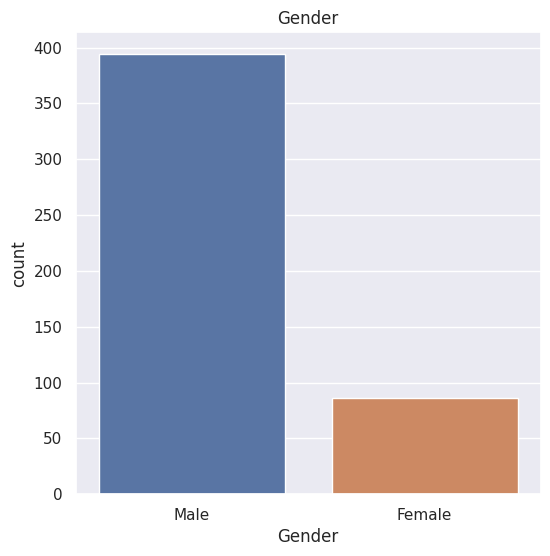

In [ ]:
#distribution of gender
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=loan_data1)
plt.title('Gender')
plt.show()

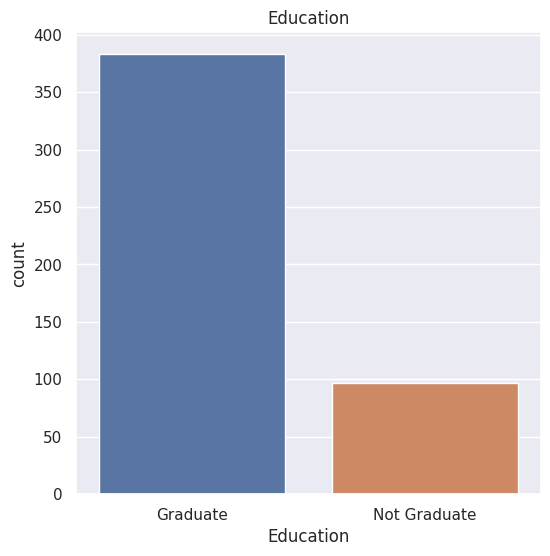

In [ ]:
#distribution of education
plt.figure(figsize=(6,6))
sns.countplot(x='Education',data=loan_data1)
plt.title('Education')
plt.show()

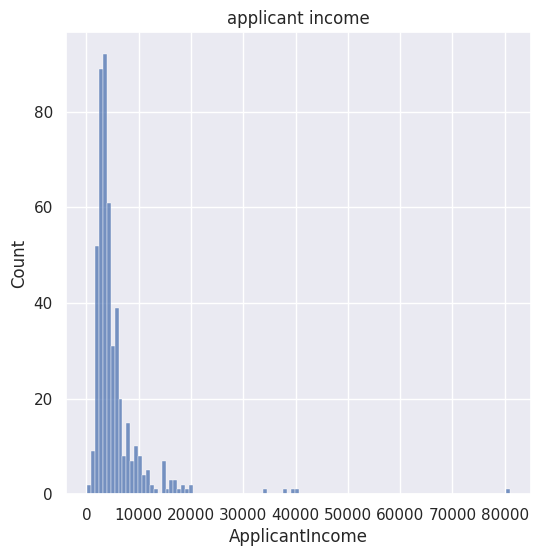

In [ ]:
#distribution of applicant income
plt.figure(figsize=(6,6))
sns.histplot(loan_data1['ApplicantIncome'])
plt.title('applicant income')
plt.show()

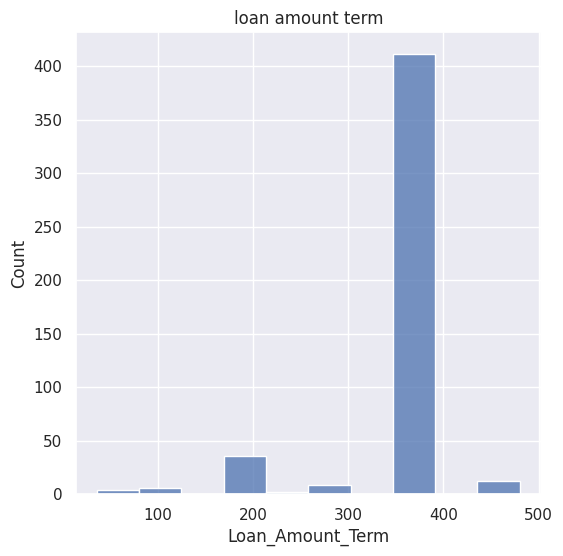

In [ ]:
#distribution of loan amount term
plt.figure(figsize=(6,6))
sns.histplot(loan_data1['Loan_Amount_Term'])
plt.title('loan amount term')
plt.show()

In [ ]:
loan_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
loan_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
#encoding  gender
loan_data1.replace({'Gender':{'Female':0,'Male':1}},inplace=True)

#encoding Married
loan_data1.replace({'Married':{'No':0,'Yes':1}},inplace=True)

#encoding Education
loan_data1.replace({'Education':{'Graduate':0,'Not Graduate':1}},inplace=True)

#encoding self employed
loan_data1.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)

#encoding property area
loan_data1.replace({'Property_Area':{'Semiurban':0,'Urban':1,'Rural':2}},inplace=True)

#encoding dependency
loan_data1.replace({'Dependents':{'3+':4}},inplace=True)



<ipython-input-103-4ac8d63a3ab1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data1.replace({'Gender':{'Female':0,'Male':1}},inplace=True)
<ipython-input-103-4ac8d63a3ab1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data1.replace({'Married':{'No':0,'Yes':1}},inplace=True)
<ipython-input-103-4ac8d63a3ab1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
loan_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
x=loan_data1.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=loan_data1['Loan_Status']

In [ ]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          0              0             4583   
2         1        1          0          0              1             3000   
3         1        1          0          1              0             2583   
4         1        0          0          0              0             6000   
5         1        1          2          0              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          0              0             2900   
610       1        1          4          0              0             4106   
611       1        1          1          0              0             8072   
612       1        1          2          0              0             7583   
613       0        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
print(y)

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (384, 11) (96, 11)


In [ ]:
print(x_train)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
337       1        1          2          0              1             2500   
358       1        1          0          1              0             3000   
405       0        0          0          0              0             4547   
248       1        1          1          0              0             2882   
457       1        1          0          0              0             3708   
..      ...      ...        ...        ...            ...              ...   
459       1        1          0          0              0             8334   
275       1        1          1          0              0             2750   
76        1        0          0          0              0             3750   
286       0        0          0          0              1             2600   
389       1        1          0          0              0             5488   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
print(y_train)

337    Y
358    N
405    Y
248    Y
457    N
      ..
459    N
275    Y
76     N
286    N
389    Y
Name: Loan_Status, Length: 384, dtype: object


In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
loan_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 52.5+ KB


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 337 to 389
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             384 non-null    int64  
 1   Married            384 non-null    int64  
 2   Dependents         384 non-null    object 
 3   Education          384 non-null    int64  
 4   Self_Employed      384 non-null    int64  
 5   ApplicantIncome    384 non-null    int64  
 6   CoapplicantIncome  384 non-null    float64
 7   LoanAmount         384 non-null    float64
 8   Loan_Amount_Term   384 non-null    float64
 9   Credit_History     384 non-null    float64
 10  Property_Area      384 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 36.0+ KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 384 entries, 337 to 389
Series name: Loan_Status
Non-Null Count  Dtype 
--------------  ----- 
384 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [ ]:
x_train_predict=model.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_predict)

In [ ]:
print('accuracy of training data is',training_data_accuracy)

accuracy of training data is 0.7890625


In [ ]:
x_test_predict=model.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_predict)

In [ ]:
print('test data accuracy is',test_data_accuracy)

test data accuracy is 0.78125


In [ ]:
x_test.to_csv('loan_data1.csv',index=False)
from google.colab import files
files.download('loan_data1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
input_data=(1,1,2,1,0,3273,1820.0,81.0,360.0,1.0,1)
input_data_array=np.array(input_data)
input_data_reshape=input_data_array.reshape(1,-1)
prediction=model.predict(input_data_reshape)
print(prediction[0])

if(prediction[0]=='Y'):
  print('the loan is approved')
else:
  print('the loan is not approved')

Y
the loan is approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
